In [1]:
from PIL import Image #, ImageOps, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def display(pixels,row=1, column=2, index=1):
    plt.subplot(row, column, index)
    plt.imshow(pixels)
    plt.gray()
    plt.axis('off')
    plt.show()
    return

In [3]:
def histogram(pixels, number_of_bins=256, row=2, column=2, index=1):
    plt.subplot(row, column, index)
    plt.hist(pixels.flatten(), bins=np.arange(number_of_bins)) 
    plt.gray()
    #plt.axis('off')
    plt.show()
    return

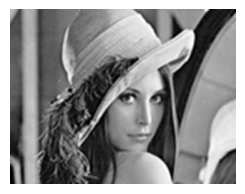

In [4]:
# 画像の読み込み & グレースケールに変換
img = Image.open('../imgs/girl.jpg').convert('L')
a = np.array(img)
display(a)

### 反転

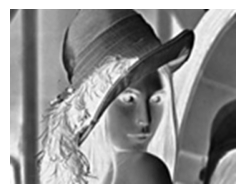

In [5]:
a_inv = 255 - a 
display(a_inv)

### 階調変換

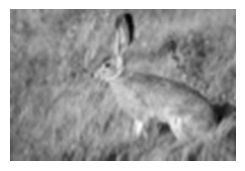

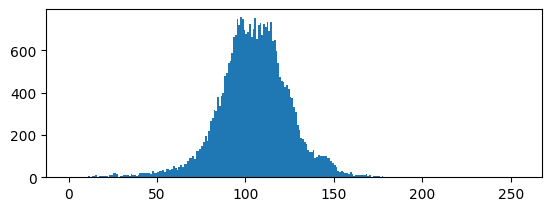

In [27]:
# 元の画像を確認する

img = Image.open('../4-histogram/imgs/usagi.jpg').convert('L')
a=np.array(img)
display(a)
histogram(a,256,2,1,1)

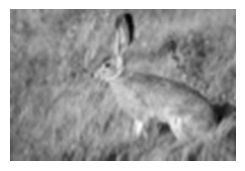

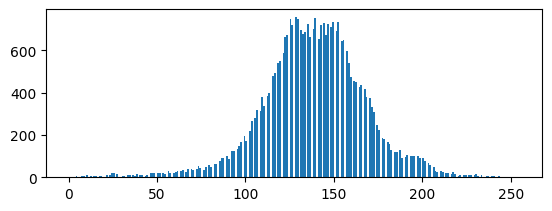

In [28]:
#画像の画素値を[0,255]の範囲に変換

b = ((a - a.min()) / (a.max()-a.min())) * 255
display(b)
histogram(b,256,2,1,1)

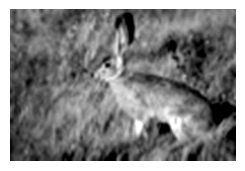

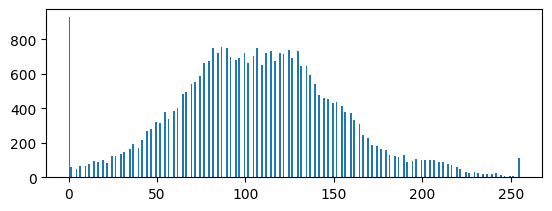

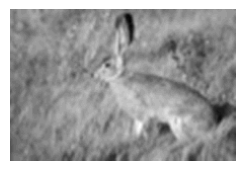

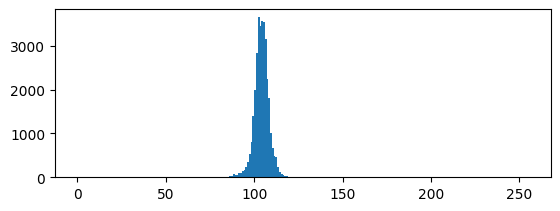

In [26]:
# 画像ライブラリPillowを使う。

from PIL import ImageEnhance
enhancer=ImageEnhance.Contrast(img)  
a=np.array(enhancer.enhance(2.5))
display(a)
histogram(a,256,2,1,1)

a=np.array(enhancer.enhance(0.2))
display(a)
histogram(a,256,2,1,1)

### ガマ変換

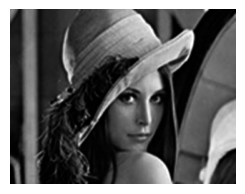

In [69]:
#ガマ変換
a_gama = 255*(a/255.0)**2
display(a_gama)

### 2値化


In [70]:
def threshold_otsu(gray, min_value=0, max_value=255):
    
    # ヒストグラムの算出
    hist = [np.sum(gray == i) for i in range(256)]

    s_max = (0,-10)  #(最大クラス間分散のindex, 最大クラス間分散）:　indexは[0,255]

    for th in range(256):
        
        # クラス1とクラス2の画素数を計算
        n1 = sum(hist[:th])
        n2 = sum(hist[th:])
        
        # クラス1とクラス2の画素値の平均を計算
        if n1 == 0 : mu1 = 0
        else : mu1 = sum([i * hist[i] for i in range(0,th)]) / n1   
        if n2 == 0 : mu2 = 0
        else : mu2 = sum([i * hist[i] for i in range(th, 256)]) / n2

        # クラス間分散の分子を計算
        s = n1 * n2 * (mu1 - mu2) ** 2

        # クラス間分散の分子が最大のとき、クラス間分散の分子と閾値を記録
        if s > s_max[1]:
            s_max = (th, s)
    
    # クラス間分散が最大のときの閾値を取得
    t = s_max[0]

    # 算出した閾値で二値化処理
    gray[gray < t] = 0 #min_value
    gray[gray >= t] = 255 #max_value

    return gray

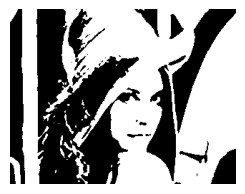

In [71]:
otsu = threshold_otsu(a)
display(otsu)

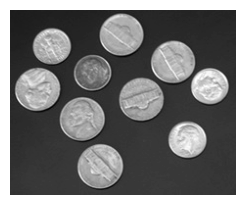

In [119]:
img = Image.open('imgs/coin.jpg').convert('L')
display(img)

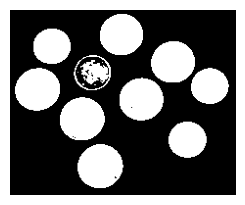

In [120]:
a = threshold_otsu(np.array(img))
display(a)

### 膨張

In [130]:
def dilation(pixels):
  h, w = pixels.shape
  filtered_pixcels = np.zeros((h, w,))
  for x in range(w):
    for y in range(h):
      x1 = max(0, x - 1)
      x2 = min(x + 1, w -1)
      y1 = max(0, y - 1)
      y2 = min(y + 1, h - 1)
      #8連結
      if (pixels[y1:y2 + 1, x1:x2 + 1] ==255).any():
        filtered_pixcels[y][x] = 255
      else:
        filtered_pixcels[y][x] = 0
  return filtered_pixcels


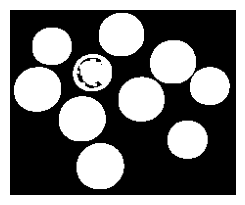

In [131]:
a_dilation = dilation(a)
display(a_dilation)

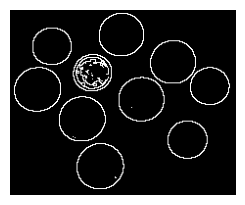

In [132]:
edge = a_dilation - a
edge = np.where(edge<0, 0, edge)
edge = np.where(edge>255, 255, edge)
display(edge)

### 収縮

In [159]:
def erosion(pixels):
  h, w = pixels.shape
  filtered_pixcels = np.zeros((h, w,))
  for x in range(w):
    for y in range(h):
      x1 = max(0, x - 1)
      x2 = min(x + 1, w -1)
      y1 = max(0, y - 1)
      y2 = min(y + 1, h - 1) 
      #　8連結
      if (pixels[y1:y2 + 1, x1:x2 + 1] == 0).any():
        filtered_pixcels[y][x] = 0
      else:
        filtered_pixcels[y][x] = 255
  return filtered_pixcels

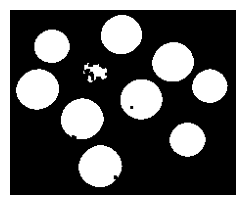

In [134]:
a_erosion = erosion(a)
display(a_erosion)

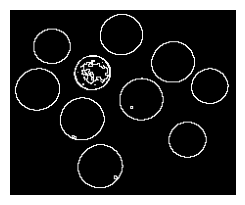

In [135]:
edge = a - a_erosion
edge = np.where(edge<0, 0, edge)
edge = np.where(edge>255, 255, edge)
display(edge)

### オープニング: 収縮してから膨張

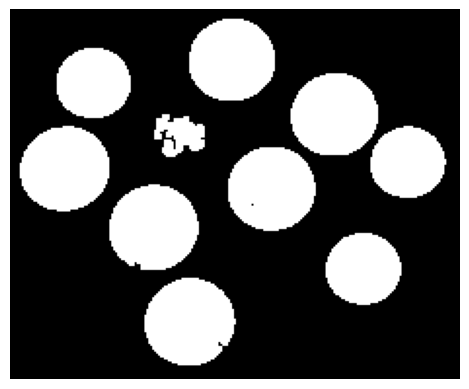

In [153]:
#オープニング：収縮してから膨張
a_erosion = erosion(a)
ed = dilation(a_erosion)
display(ed,1,1,1)

### クロージング：膨張してから収縮

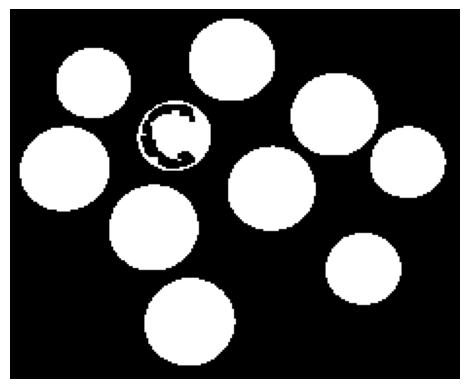

In [154]:
#クロージング：膨張してから収縮
a_dilation = dilation(a)
de = erosion(a_dilation)
display(de,1,1,1)

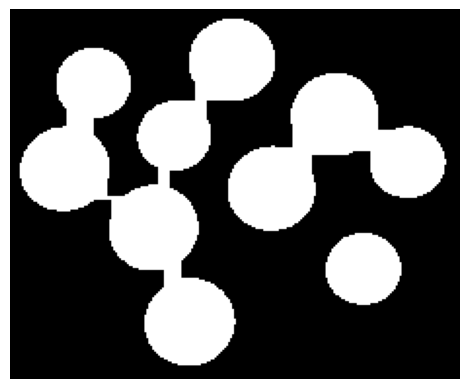

In [157]:
##クロージング：数回膨張してから同じ回数で収縮
b = dilation(a)
b = dilation(b)
b = dilation(b)
b = dilation(b)
b = erosion(b)
b = erosion(b)
b = erosion(b)
b = erosion(b)
display(b,1,1,1)
